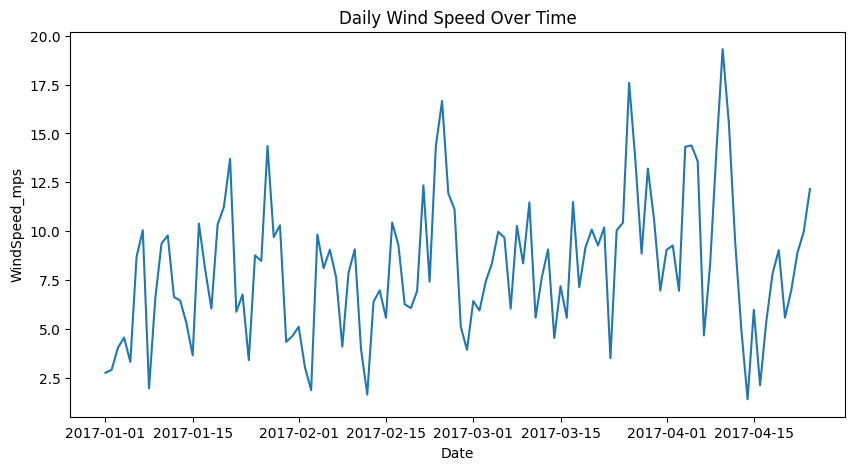

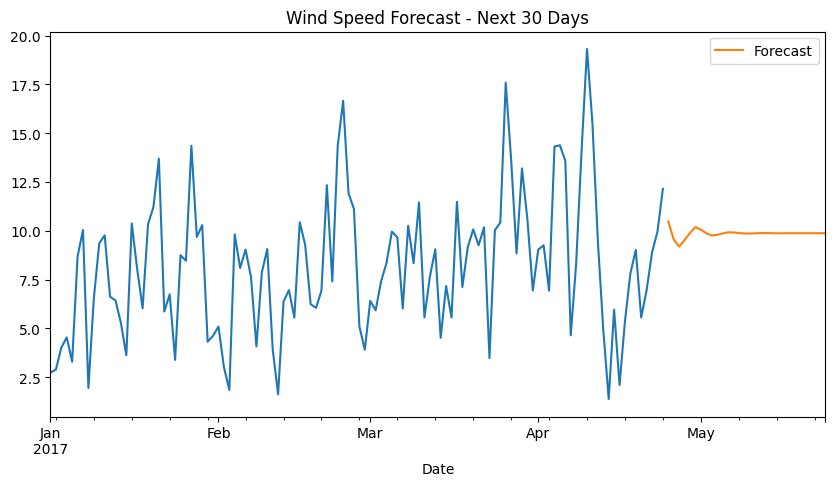

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Cell 2: Load Data
# Load the CSV file
df = pd.read_csv('../data/wind_data.csv')

# Parse the 'Date' column as datetime, coercing errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Ensure the data has daily frequency
df = df.asfreq('D')

# Fill missing values using forward fill
df = df.ffill()

# Cell 3: Visualize Wind Speed
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='WindSpeed_mps')
plt.title('Daily Wind Speed Over Time')
plt.show()

# Cell 4: Forecast using ARIMA
model = ARIMA(df['WindSpeed_mps'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Cell 5: Plot Forecast
plt.figure(figsize=(10,5))
df['WindSpeed_mps'].plot(label='History')
forecast.plot(label='Forecast', legend=True)
plt.title('Wind Speed Forecast - Next 30 Days')
plt.show()


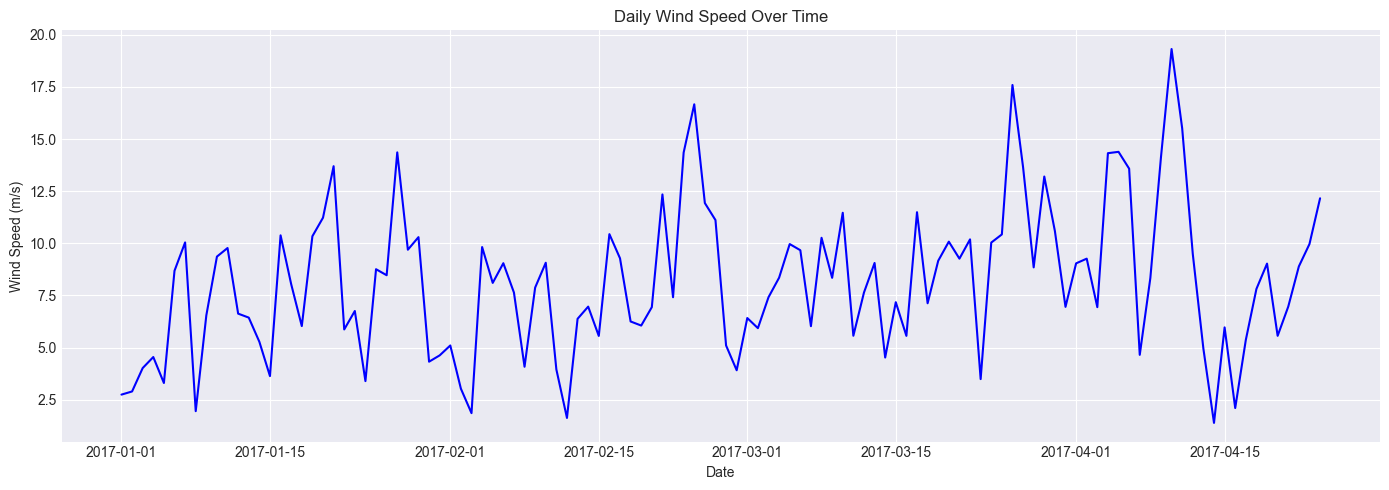

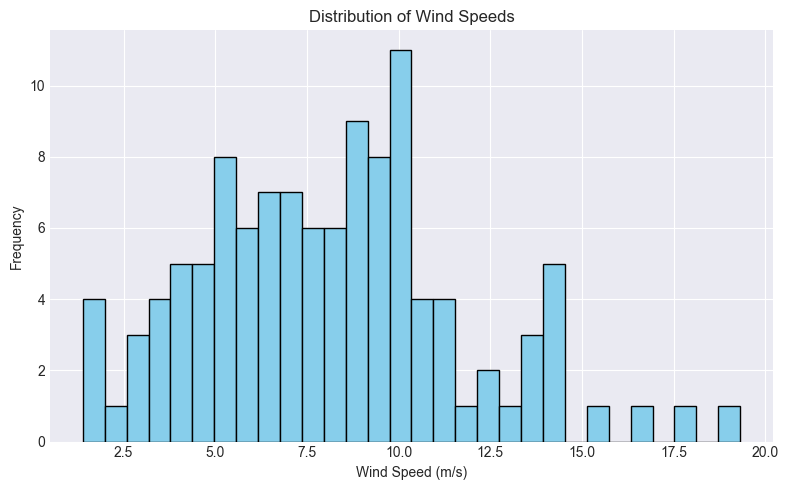

In [2]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')  # Use a valid style name from plt.style.available

# Plot 1: Wind Speed Over Time
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['WindSpeed_mps'], color='blue')
plt.title('Daily Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Histogram of Wind Speeds
plt.figure(figsize=(8, 5))
plt.hist(df['WindSpeed_mps'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4112\314337235.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['WindSpeed_mps'].resample('M').mean()


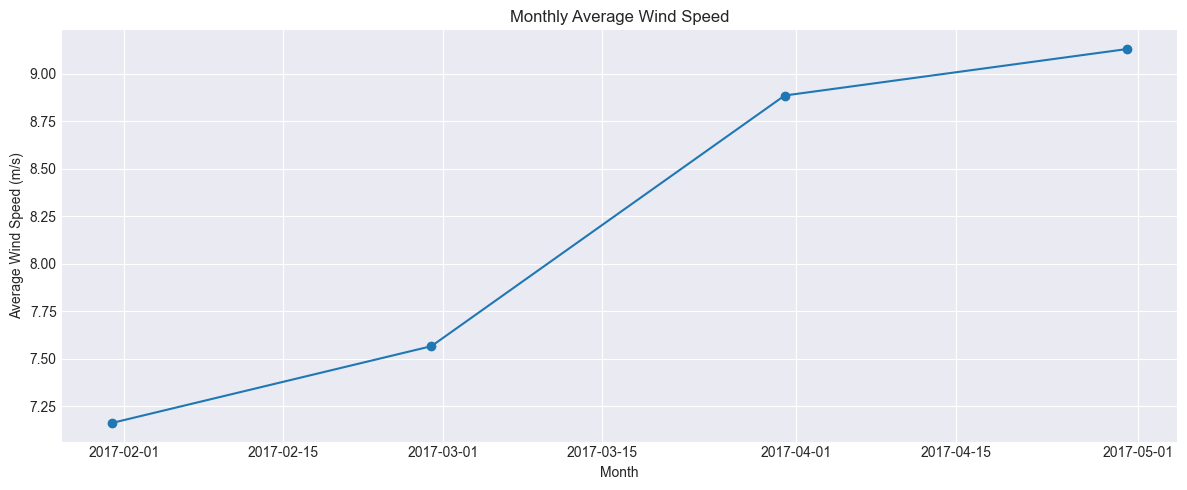

In [3]:
# Monthly Average Wind Speed
monthly_avg = df['WindSpeed_mps'].resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-')
plt.title('Monthly Average Wind Speed')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\user\Wind Energy Feasibility Dashboard\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
09:56:46 - cmdstanpy - INFO - Chain [1] start processing
09:56:49 - cmdstanpy - INFO - Chain [1] done processing


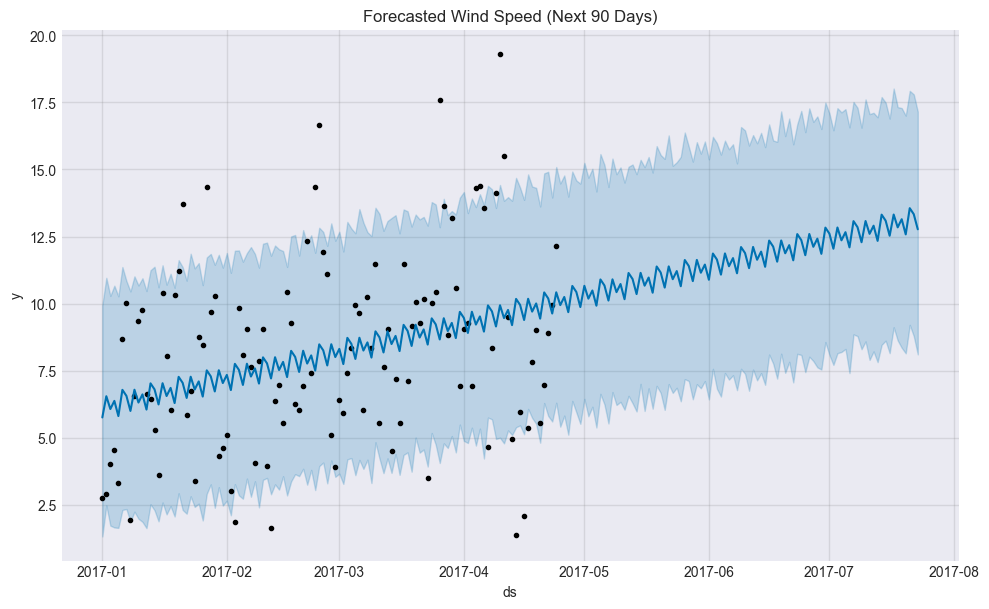

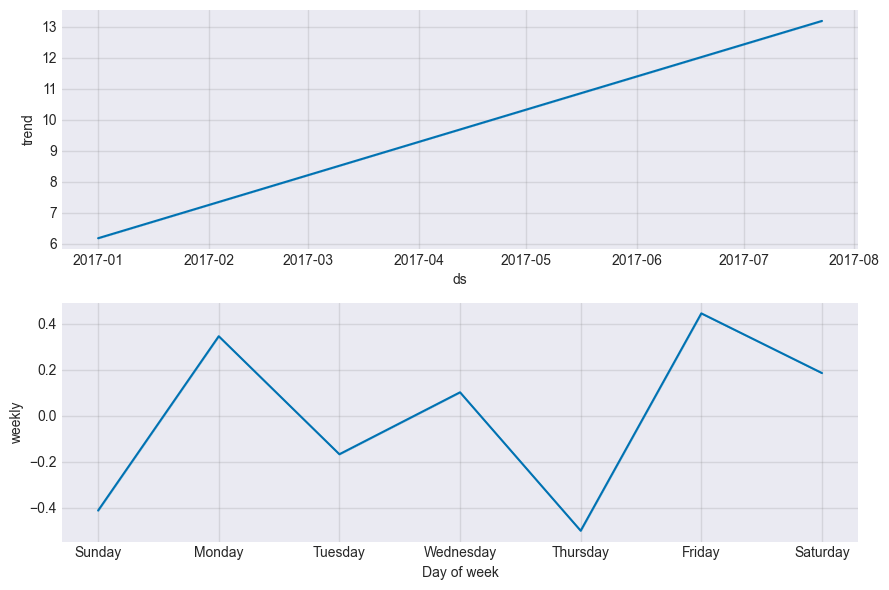

In [4]:

from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
df_prophet = df.reset_index()[['Date', 'WindSpeed_mps']]
df_prophet.columns = ['ds', 'y']

# Create and train the model
model = Prophet()
model.fit(df_prophet)

# Forecast next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Forecasted Wind Speed (Next 90 Days)")
plt.show()

# Plot trend, weekly and yearly seasonality
fig2 = model.plot_components(forecast)
plt.show()


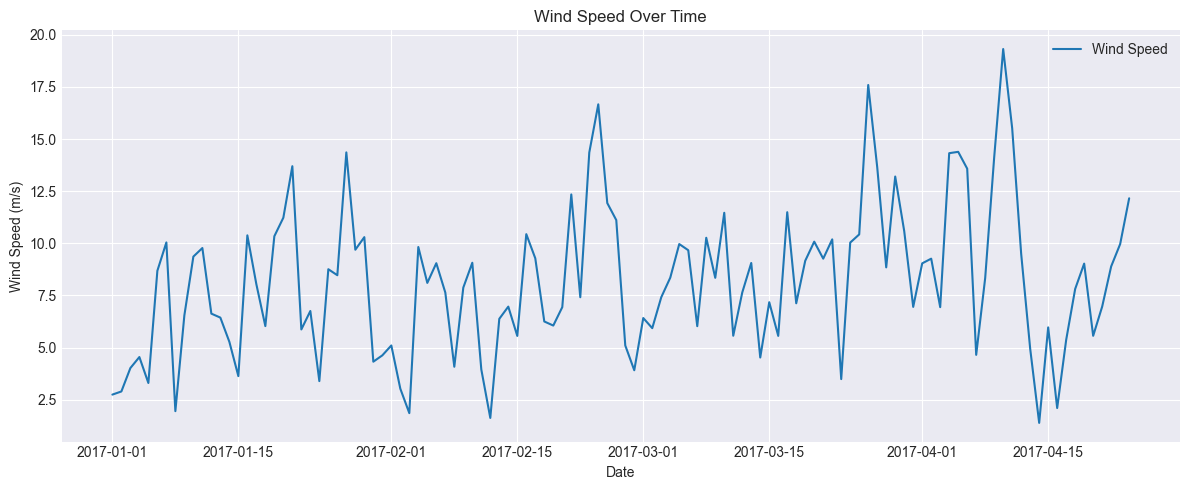

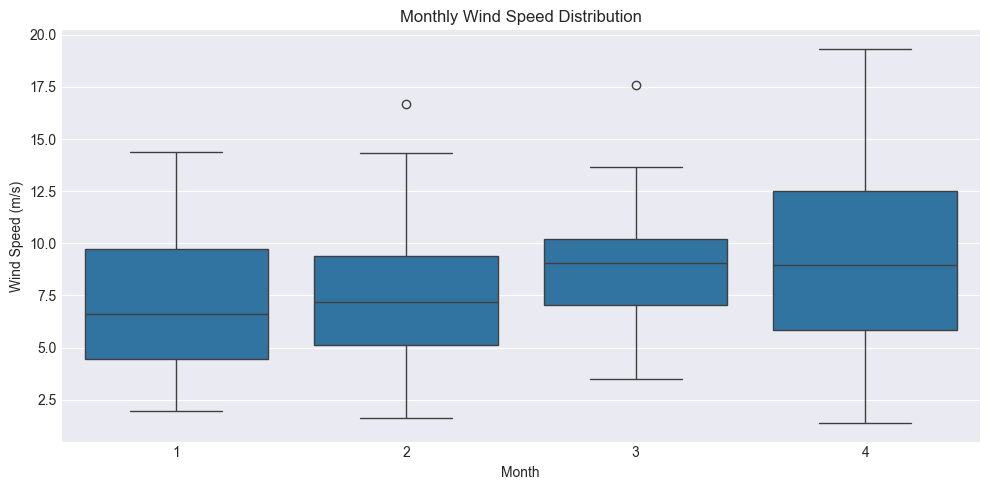

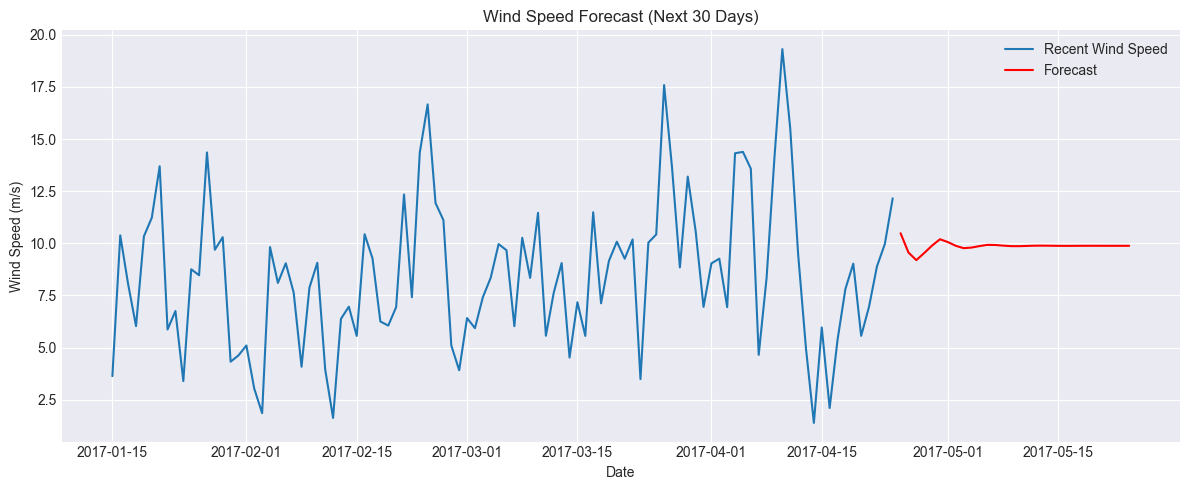

In [5]:
# EDA - Plot Time Series
# Ensure index is valid datetime and drop rows with NaT index
df_clean = df[~df.index.isna()].copy()

plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['WindSpeed_mps'], label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Seasonal Plot (Optional)
plt.figure(figsize=(10, 5))

df_box = df.copy()
df_box.index = pd.to_datetime(df_box.index, errors='coerce')  # ✅ Ensure datetime format
df_box['Month'] = df_box.index.month                          # ✅ Now this works

sns.boxplot(x='Month', y='WindSpeed_mps', data=df_box)
plt.title('Monthly Wind Speed Distribution')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

# ARIMA Forecasting
# Ensure index is datetime before modeling/forecasting
# Fix the index
df.index = pd.to_datetime(df.index, errors='coerce')
df = df[~df.index.isna()]  # remove NaT rows

# ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['WindSpeed_mps'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['WindSpeed_mps'][-100:], label='Recent Wind Speed')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Wind Speed Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



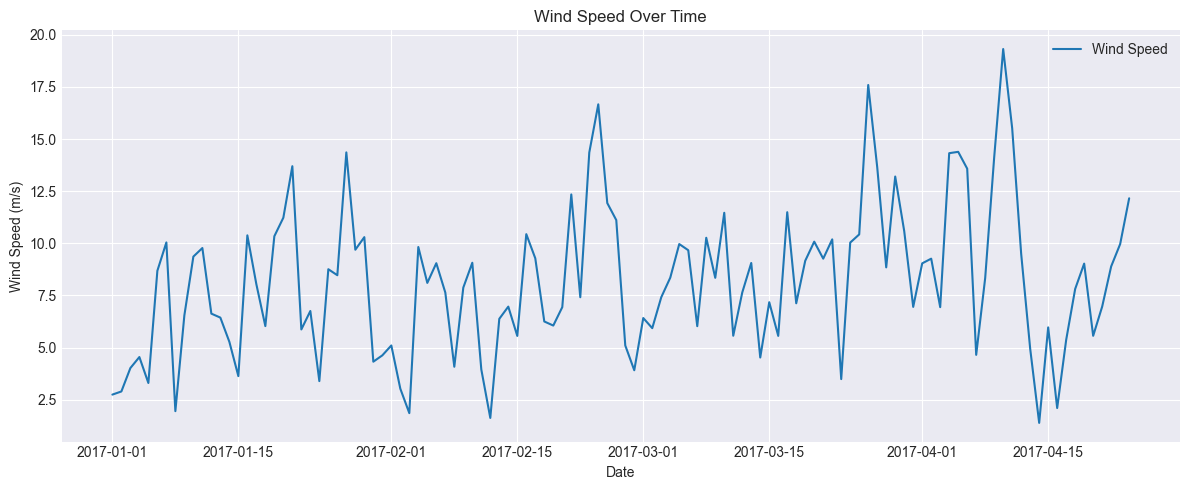

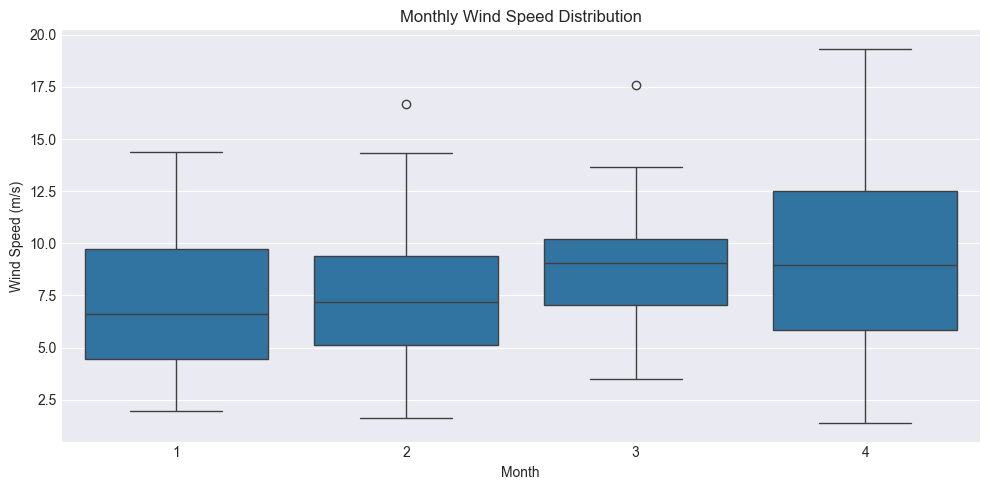

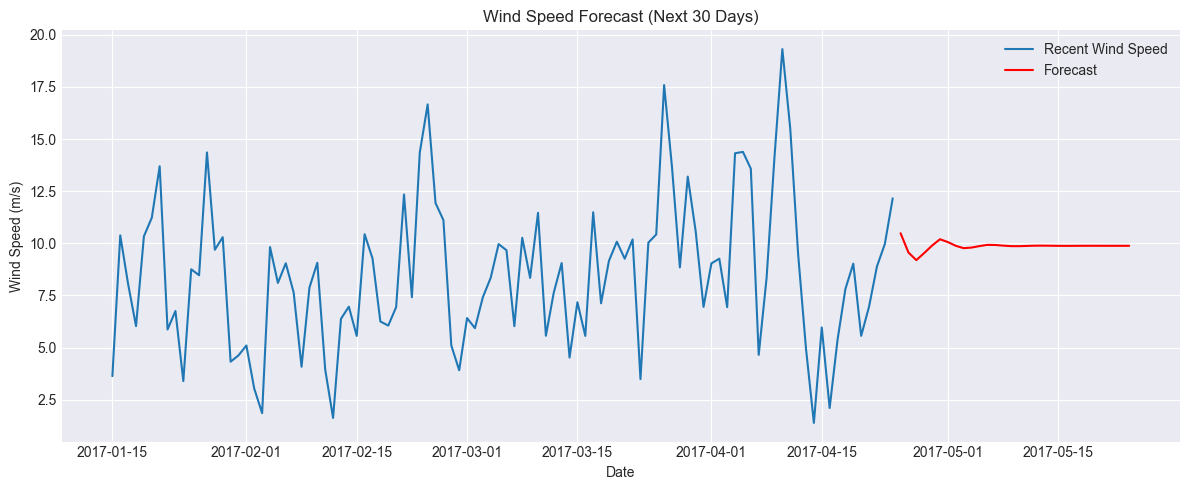

In [6]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Use existing df from notebook context
# Clean data
df = df[['WindSpeed_mps']].dropna()
df = df[~df.index.duplicated(keep='first')]  # Remove duplicate dates if any
df = df.sort_index()

# EDA - Time Series Plot
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['WindSpeed_mps'], label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Seasonal Box Plot
df_box = df.copy()
df_box['Month'] = df_box.index.to_series().dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='WindSpeed_mps', data=df_box)
plt.title('Monthly Wind Speed Distribution')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

# ARIMA Forecast
model = ARIMA(df['WindSpeed_mps'], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Forecast Plot
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['WindSpeed_mps'][-100:], label='Recent Wind Speed')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Wind Speed Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


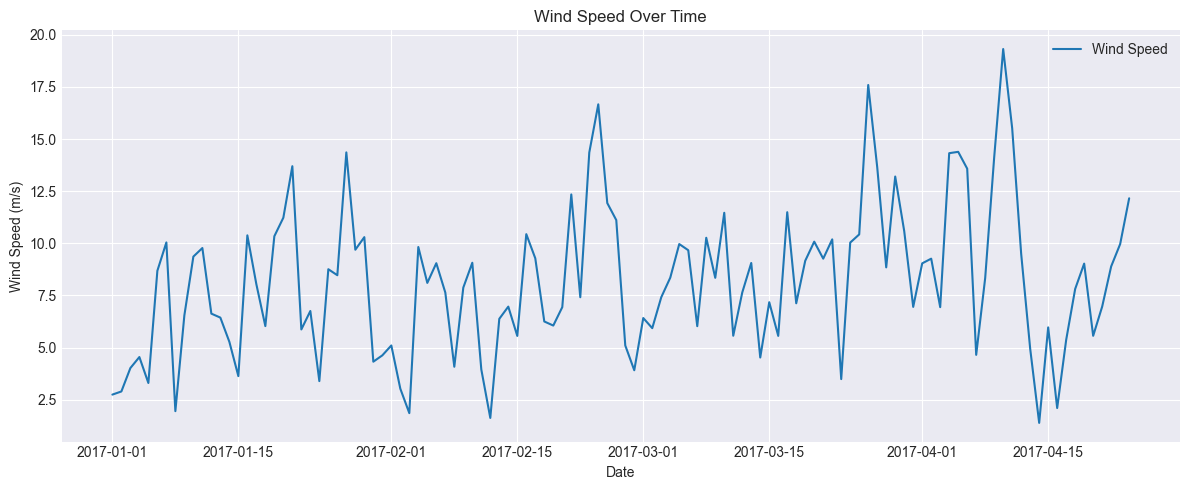

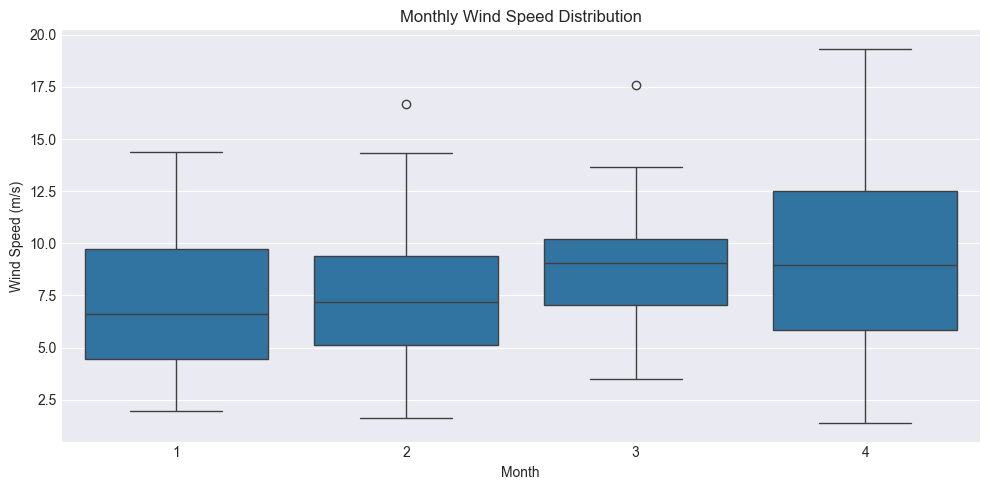

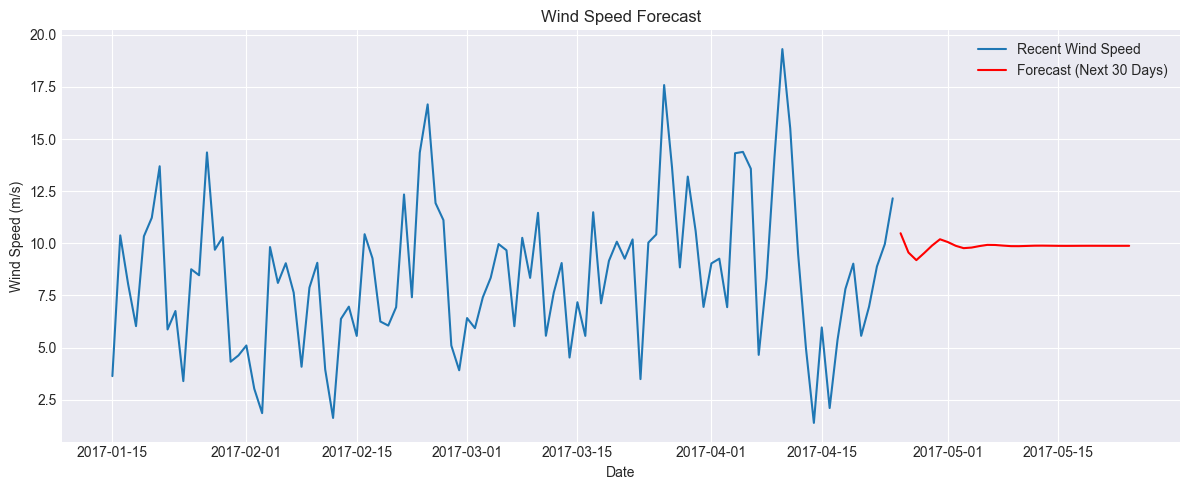

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# EDA - Time Series Plot
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['WindSpeed_mps'], label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Monthly Seasonality Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='WindSpeed_mps', data=df_box)
plt.title('Monthly Wind Speed Distribution')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

# ARIMA Forecasting
model = ARIMA(df['WindSpeed_mps'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast 30 Days
forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['WindSpeed_mps'][-100:], label='Recent Wind Speed')
plt.plot(future_dates, forecast, label='Forecast (Next 30 Days)', color='red')
plt.title('Wind Speed Forecast')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
